<a href="https://colab.research.google.com/github/M-Amrollahi/M-Amrollahi/blob/main/ML-notes/polynomial_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = np.linspace(0,10,20)

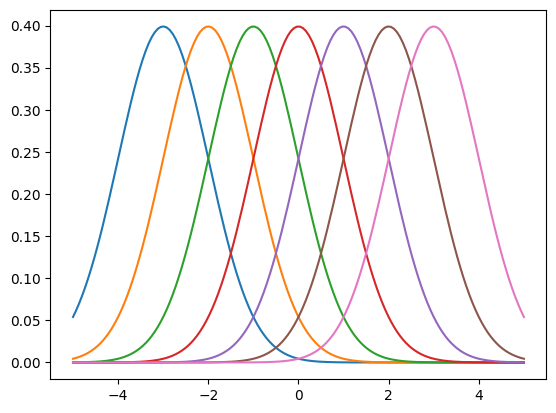

In [3]:
def gaussian(x, mu, sigma):
    return 1 / (np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(x - mu)**2 / (2 * sigma**2))

x_values = np.linspace(-5, 5, 150)
lst_res=[]
for mu, sig in [(-3, 1), (-2, 1), (-1,1),(0,1),(1,1), (2, 1),(3,1)]:
    y=gaussian(x_values, mu, sig)
    lst_res.append(y)
    plt.plot(x_values, y)

plt.show()

In [4]:
ys = np.array(lst_res)

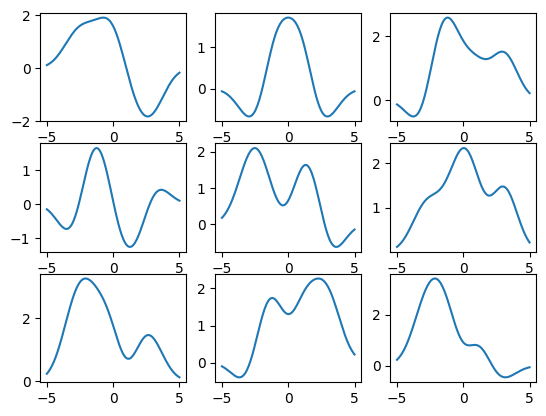

In [5]:
lst_res=[]
for i in range(9):
    y = (np.random.randint(-3,5,(7,1)) * ys).sum(axis=0)
    lst_res.append(y)
    ax = plt.subplot(3,3,i+1)
    ax.plot(x_values,y)

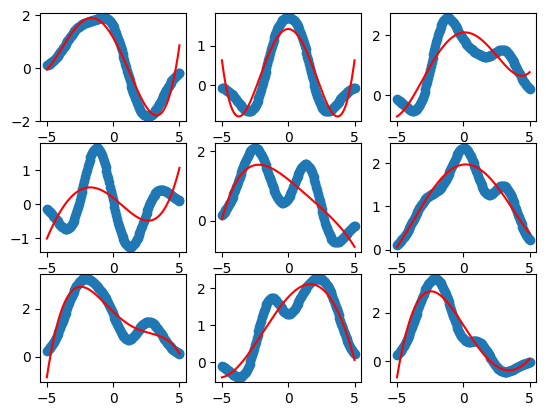

In [6]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


# Create a polynomial features object of degree 2
poly = PolynomialFeatures(degree=4)

# Transform the input data to include polynomial terms up to degree 2
x_poly = poly.fit_transform(x_values.reshape(-1, 1))

# Create a linear regression object
model = LinearRegression()

# Fit the linear regression model to the transformed data
for i in range(9):
    model.fit(x_poly, lst_res[i])

    # Predict the output for some new data
    x_new_poly = poly.transform(x_values.reshape(-1, 1))
    y_new = model.predict(x_new_poly)

    # Plot the original data and the regression line

    ax = plt.subplot(3,3,i+1)
    ax.scatter(x_values, lst_res[i])
    ax.plot(x_values, y_new, c='r')

plt.show()

In [7]:
model.coef_

array([ 0.        , -0.85014566, -0.00928349,  0.0370474 , -0.00248229])

In [8]:
model.intercept_

1.48308802375302

In [10]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate some random data
x = np.linspace(0, 10, 100)
y = 1.5 * x**2 - 5 * x + 2 + np.random.randn(100)

# Create a polynomial features object of degree 2
poly = PolynomialFeatures(degree=2)

# Transform the input data to include polynomial terms up to degree 2
x_poly = poly.fit_transform(x.reshape(-1, 1))

# Create a linear regression object
model = LinearRegression()

# Fit the linear regression model to the transformed data
model.fit(x_poly, y)

# Print the coefficients
print(model.coef_)

[ 0.         -5.03201721  1.50199125]


In [23]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate some random data with two input features
x1 = np.random.randn(100)
x2 = np.random.randn(100)
y = 2 * x1**2 + 3 * x2**2 - 4 * x1 * x2 + np.random.randn(100)

# Create a polynomial features object of degree 2
poly = PolynomialFeatures(degree=2)

# Transform the input data to include polynomial terms up to degree 2
X_poly = poly.fit_transform(np.stack((x1, x2), axis=1))

# Create a linear regression object
model = LinearRegression()

# Fit the linear regression model to the transformed data
model.fit(X_poly, y)

# Print the coefficients
print(model.coef_)

[ 0.          0.01615417  0.10653805  1.98427072 -3.85809294  3.10292491]


In [24]:
poly.get_feature_names_out()

array(['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'], dtype=object)